In [1]:
%matplotlib inline
import quantstats as qs

# extend pandas functionality with metrics, etc.
qs.extend_pandas()

# fetch the daily returns for a stock
stock = qs.utils.download_returns('META')

# show sharpe ratio
qs.stats.sharpe(stock)

# or using extend_pandas() :)
stock.sharpe()

0.7346810346580539

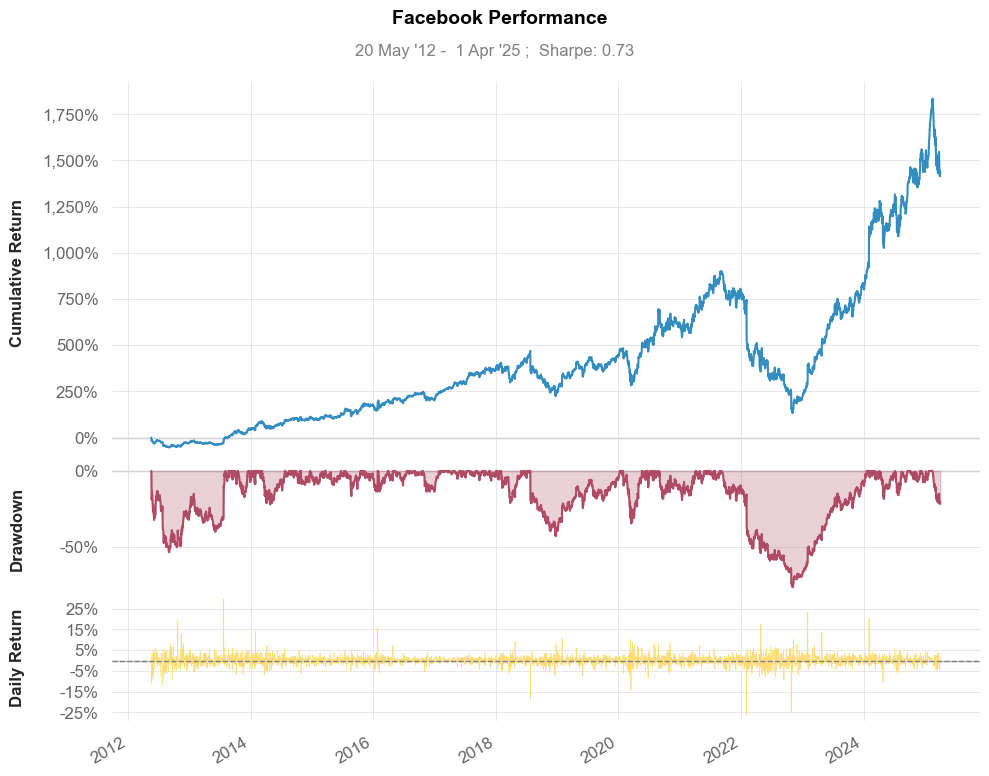

In [2]:
qs.plots.snapshot(stock, title='Facebook Performance', show=True)

# can also be called via:
# stock.plot_snapshot(title='Facebook Performance', show=True)

In [5]:
import quantstats as qs

# Ensure stock data is in a proper format
stock = qs.utils.download_returns("SPY")  # Download SPY returns if not already prepared

# Generate report
qs.reports.html(stock, "SPY", output="report.html")


C:\Users\Shubham lodha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Shubham lodha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Shubham lodha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data

UnsupportedFunctionCall: numpy operations are not valid with resample. Use .resample(...).sum() instead

In [11]:
!pip install pandas==1.5.3

DEPRECATION: Loading egg at c:\users\shubham lodha\appdata\local\programs\python\python311\lib\site-packages\ibapi-10.35.1-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


                           Strategy
-------------------------  ----------
Start Period               1993-02-01
End Period                 2025-04-01
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          2,194.12%
CAGR﹪                     6.95%

Sharpe                     0.62
Prob. Sharpe Ratio         99.98%
Smart Sharpe               0.57
Sortino                    0.88
Smart Sortino              0.81
Sortino/√2                 0.62
Smart Sortino/√2           0.57
Omega                      1.12

Max Drawdown               -55.19%
Longest DD Days            2404
Volatility (ann.)          18.59%
Calmar                     0.13
Skew                       -0.06
Kurtosis                   11.37

Expected Daily %           0.04%
Expected Monthly %         0.81%
Expected Yearly %          9.96%
Kelly Criterion            5.99%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.88%
Expected Shortfall (cVaR)  -1.88%

Max Consecutive Wins 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2007-10-10,2009-03-09,2012-08-15,1772,-55.189449,-50.090594
2,2000-03-27,2002-10-09,2006-10-25,2404,-47.515867,-44.117743
3,2020-02-20,2020-03-23,2020-08-07,170,-33.717262,-29.109768
4,2022-01-04,2022-10-12,2023-12-12,708,-24.496386,-23.177144
5,2018-09-21,2018-12-24,2019-04-11,203,-19.348910,-15.952027


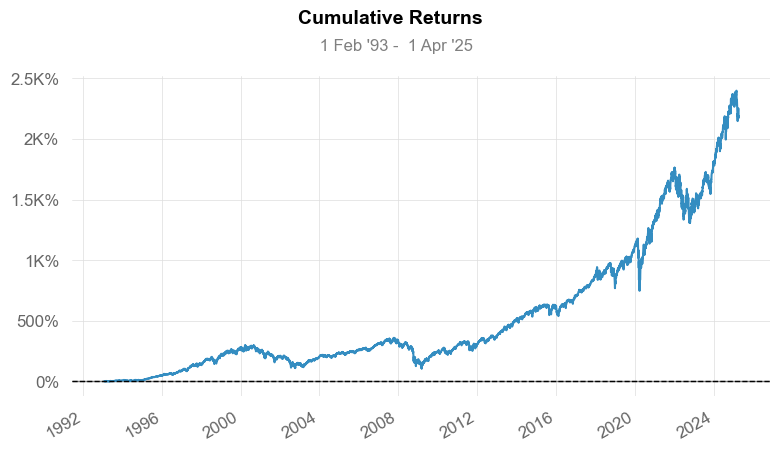

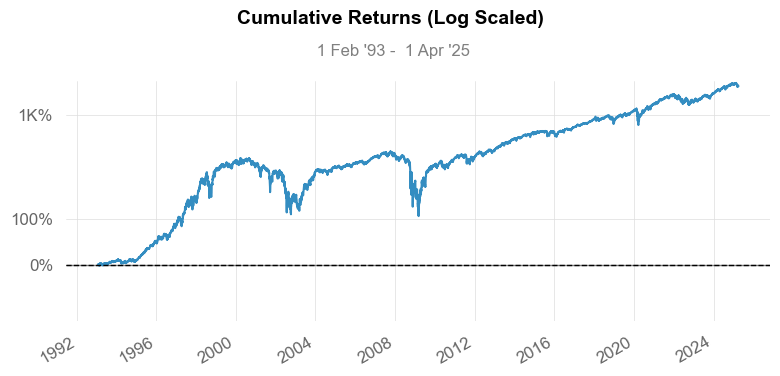

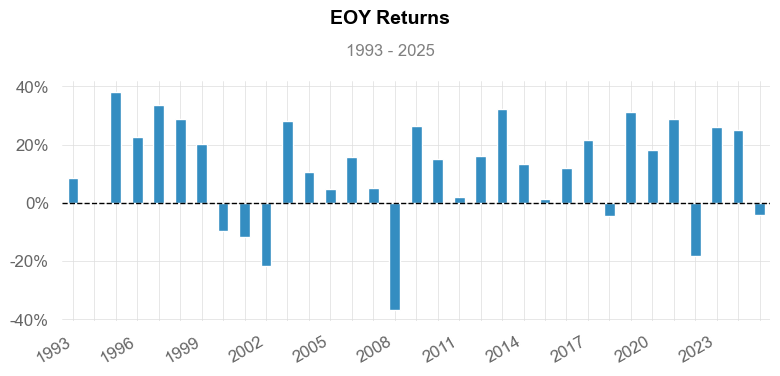

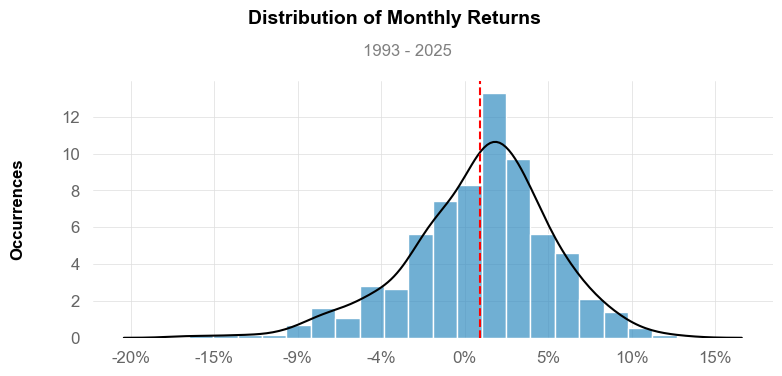

C:\Users\Shubham lodha\AppData\Local\Programs\Python\Python311\Lib\site-packages\quantstats\_plotting\core.py:294: FutureWarning: Passing additional kwargs to DatetimeIndexResampler.sum has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  returns = returns.last() if compound is True else returns.sum(axis=0)


UnsupportedFunctionCall: numpy operations are not valid with resample. Use .resample(...).sum() instead

In [14]:
import quantstats as qs
import pandas as pd

# Ensure compatibility with QuantStats (downgrade if necessary)
if int(pd.__version__.split(".")[0]) >= 2:  # Check if Pandas version is 2.x or higher
    print("Warning: Pandas 2.x may cause issues with QuantStats. Consider downgrading to Pandas 1.5.3.")
    
# Fetch SPY returns
stock = qs.utils.download_returns("SPY")

# Fix resampling issue before passing to QuantStats
stock = stock.resample("D").last()  # Ensure proper resampling

# Print a full performance report to the console
qs.reports.full(stock)


                    Strategy
------------------  ----------
Start Period        1993-02-01
End Period          2025-04-01
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   2,194.12%
CAGR﹪              6.95%

Sharpe              0.62
Prob. Sharpe Ratio  99.98%
Sortino             0.88
Sortino/√2          0.62
Omega               1.12

Max Drawdown        -55.19%
Longest DD Days     2404

Gain/Pain Ratio     0.12
Gain/Pain (1M)      0.77

Payoff Ratio        0.94
Profit Factor       1.12
Common Sense Ratio  1.06
CPC Index           0.58
Tail Ratio          0.94
Outlier Win Ratio   4.28
Outlier Loss Ratio  3.93

MTD                 0.28%
3M                  -4.0%
6M                  -1.6%
YTD                 -4.0%
1Y                  8.61%
3Y (ann.)           8.7%
5Y (ann.)           10.8%
10Y (ann.)          8.42%
All-time (ann.)     6.95%

Avg. Drawdown       -1.9%
Avg. Drawdown Days  26
Recovery Factor     6.68
Ulcer Index         0.15
Serenity Index      1.04


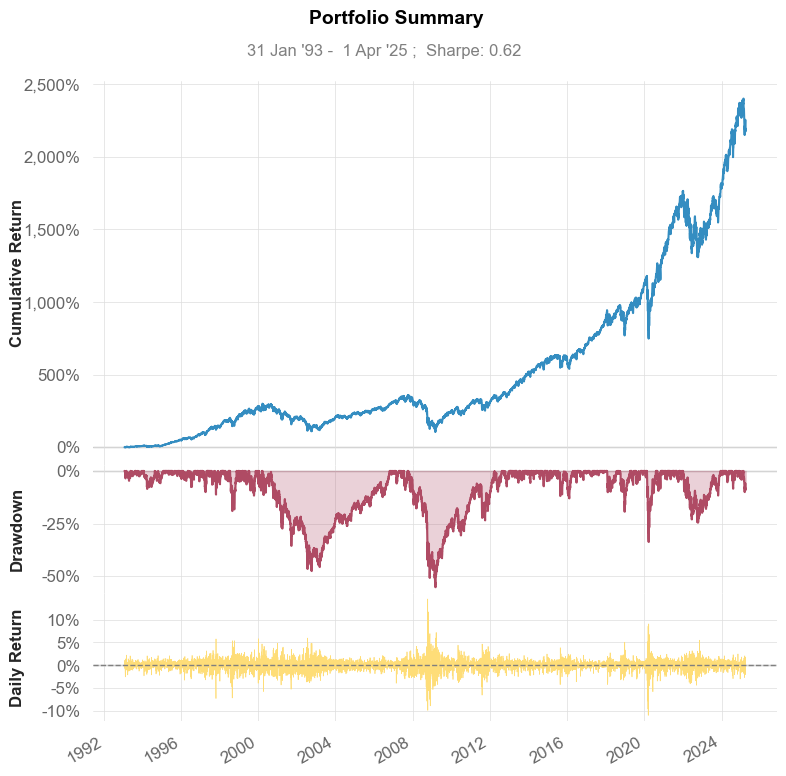

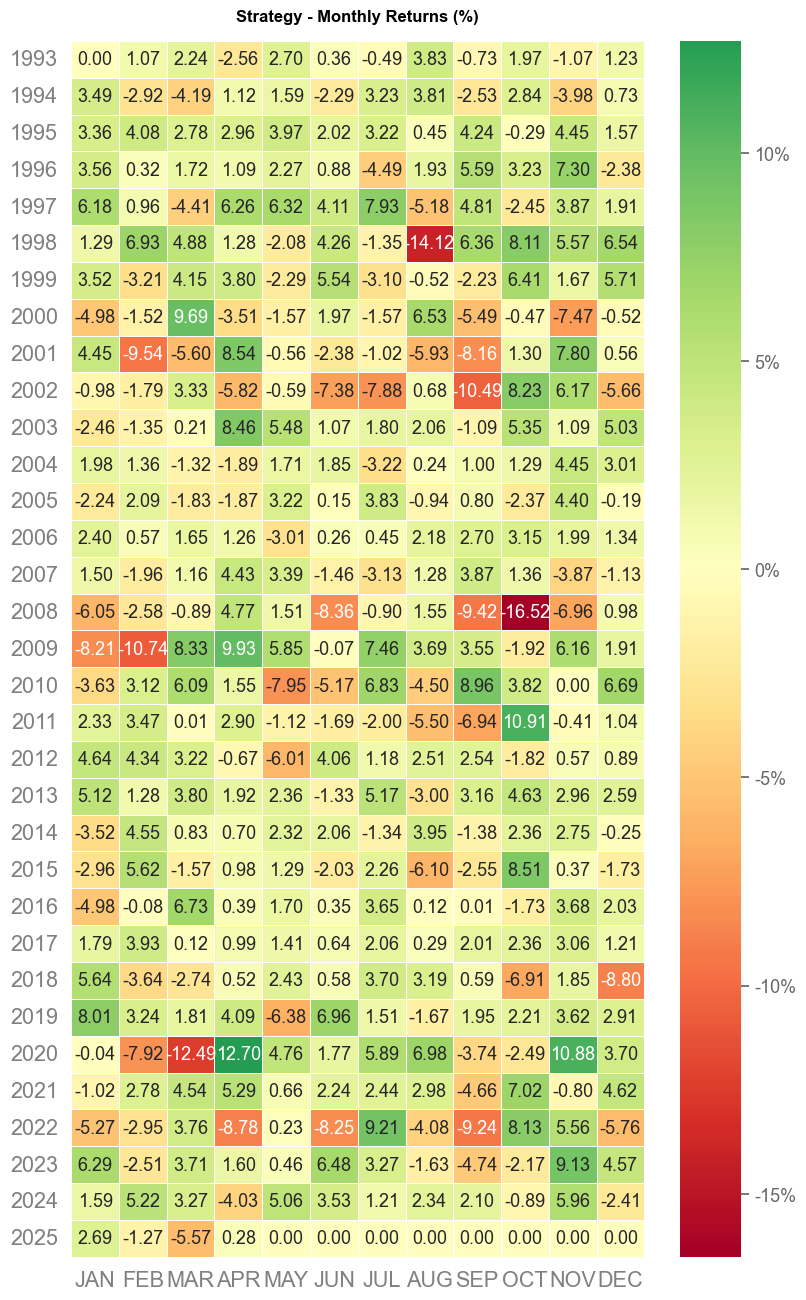

In [16]:
import quantstats as qs
import pandas as pd

# Fetch SPY returns
stock = qs.utils.download_returns("SPY")

# Fix the resampling issue manually
stock = stock.resample("D").last().dropna()  # Avoids using .sum()

# Run QuantStats report
qs.reports.basic(stock)


In [17]:
import pandas as pd
import numpy as np
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

def load_and_prepare_data(csv_path, lower_tf_interval='5T', higher_tf_interval='30T'):
    """
    Load data from a CSV file and create multiple timeframes
    
    Parameters:
    csv_path (str): Path to the CSV file
    lower_tf_interval (str): Timeframe interval for the lower timeframe (e.g. '1T', '5T', '15T')
    higher_tf_interval (str): Timeframe interval for the higher timeframe (e.g. '30T', '1H', '4H', '1D')
    """
    try:
        # Load the raw data with explicit date parsing
        raw_data = pd.read_csv(csv_path)
        
        # Parse the timestamp column after loading
        raw_data['timestamp'] = pd.to_datetime(raw_data['timestamp'], format='%d/%m/%Y %H:%M', dayfirst=True)
        
        # Set timestamp as index
        raw_data.set_index("timestamp", inplace=True)
        
        # Ensure required columns exist
        required_columns = ['open', 'high', 'low', 'close', 'volume']
        if not all(col in raw_data.columns for col in required_columns):
            missing = [col for col in required_columns if col not in raw_data.columns]
            raise ValueError(f"CSV is missing required columns: {missing}")
        
        # Sort by time to ensure correct resampling
        raw_data = raw_data.sort_index()
        
        print(f"Loaded {len(raw_data)} candles from {csv_path}")
        
        # Generate lower timeframe data by resampling
        lower_tf_data = raw_data.resample(lower_tf_interval).agg({
            'open': 'first',
            'high': 'max',
            'low': 'min',
            'close': 'last',
            'volume': 'sum'
        })
        
        print(f"Generated {len(lower_tf_data)} {lower_tf_interval} candles by resampling")
        
        # Generate higher timeframe data by resampling
        higher_tf_data = raw_data.resample(higher_tf_interval).agg({
            'open': 'first',
            'high': 'max',
            'low': 'min',
            'close': 'last',
            'volume': 'sum'
        })
        
        print(f"Generated {len(higher_tf_data)} {higher_tf_interval} candles by resampling")
        
        return lower_tf_data.dropna(), higher_tf_data.dropna()
    except Exception as e:
        print(f"Error loading data from CSV: {e}")
        return pd.DataFrame(), pd.DataFrame()

def calculate_emas(data, short_period, long_period):
    """Calculate EMAs for the given data with specified periods"""
    df = data.copy()
    df['EMA_Short'] = df['close'].ewm(span=short_period, adjust=False).mean()
    df['EMA_Long'] = df['close'].ewm(span=long_period, adjust=False).mean()
    return df

def determine_trend(higher_tf_data, timestamp):
    """Determine the trend on the higher timeframe at the given timestamp"""
    # Find the most recent candle on the higher timeframe
    prev_candles = higher_tf_data[higher_tf_data.index <= timestamp]
    
    if prev_candles.empty:
        return 'Neutral'  # Default to neutral if no data
    
    latest_candle = prev_candles.iloc[-1]
    
    # Determine trend based on EMA crossover
    # Access the scalar values to avoid Series comparison ambiguity
    ema_short_value = float(latest_candle['EMA_Short'])
    ema_long_value = float(latest_candle['EMA_Long'])
    
    if ema_short_value > ema_long_value:
        return 'Bullish'
    elif ema_short_value < ema_long_value:
        return 'Bearish'
    else:
        return 'Neutral'

def backtest_strategy(lower_tf_data, higher_tf_data, risk_percent=1.0, risk_reward_ratio=2, initial_capital=10000):
    if lower_tf_data.empty or higher_tf_data.empty:
        print("Cannot run backtest: Missing data")
        return pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    
    trades = []
    position = None
    entry_price = 0
    stop_loss = 0
    take_profit = 0
    
    # Create a dataframe to track daily returns
    returns_df = pd.DataFrame(index=lower_tf_data.index)
    returns_df['daily_return'] = 0.0
    
    # Track capital over time
    capital = initial_capital
    portfolio_value = [capital]
    dates = [lower_tf_data.index[0]]
    
    for i in range(1, len(lower_tf_data)):
        row = lower_tf_data.iloc[i]
        prev_row = lower_tf_data.iloc[i-1]
        
        # Get scalar values for the current row
        try:
            current_high = float(row['high'])
            current_low = float(row['low'])
            current_close = float(row['close'])
            current_ema_short = float(row['EMA_Short'])
            current_ema_long = float(row['EMA_Long'])
            
            # Get scalar values for the previous row
            prev_ema_short = float(prev_row['EMA_Short'])
            prev_ema_long = float(prev_row['EMA_Long'])
        except (ValueError, TypeError) as e:
            continue  # Skip this iteration if data conversion fails
        
        # Determine the higher timeframe trend
        current_trend = determine_trend(higher_tf_data, row.name)
        
        trade_made = False
        pnl = 0
        
        # Check for EMA crossover (Long signal) AND higher timeframe is bullish
        if prev_ema_short <= prev_ema_long and current_ema_short > current_ema_long and current_trend == 'Bullish':
            if position:
                pnl = current_close - entry_price if position == 'Long' else entry_price - current_close
                capital += pnl
                trades.append({
                    'Entry': entry_price, 
                    'Exit': current_close, 
                    'Type': position, 
                    'P&L': pnl,
                    'Date': row.name,
                    'Reason': 'New Signal'
                })
                trade_made = True
            
            position = 'Long'
            entry_price = current_close
            stop_loss = entry_price - (entry_price * risk_percent / 100)  # Convert percentage to decimal
            take_profit = entry_price + (entry_price - stop_loss) * risk_reward_ratio
            
        # Check for EMA crossover (Short signal) AND higher timeframe is bearish
        elif prev_ema_short >= prev_ema_long and current_ema_short < current_ema_long and current_trend == 'Bearish':
            if position:
                pnl = current_close - entry_price if position == 'Long' else entry_price - current_close
                capital += pnl
                trades.append({
                    'Entry': entry_price, 
                    'Exit': current_close, 
                    'Type': position, 
                    'P&L': pnl,
                    'Date': row.name,
                    'Reason': 'New Signal'
                })
                trade_made = True
            
            position = 'Short'
            entry_price = current_close
            stop_loss = entry_price + (entry_price * risk_percent / 100)  # Convert percentage to decimal
            take_profit = entry_price - (stop_loss - entry_price) * risk_reward_ratio
        
        # Exit trades if higher timeframe trend changes against position
        elif (position == 'Long' and current_trend == 'Bearish') or (position == 'Short' and current_trend == 'Bullish'):
            if position:  # Check if we have an open position
                pnl = current_close - entry_price if position == 'Long' else entry_price - current_close
                capital += pnl
                trades.append({
                    'Entry': entry_price, 
                    'Exit': current_close, 
                    'Type': position, 
                    'P&L': pnl,
                    'Date': row.name,
                    'Reason': 'Trend Change'
                })
                position = None
                trade_made = True
        
        # Check for hitting SL/TP for Long positions
        elif position == 'Long':
            if current_low <= stop_loss or current_high >= take_profit:
                exit_price = stop_loss if current_low <= stop_loss else take_profit
                pnl = exit_price - entry_price
                capital += pnl
                reason = 'Stop Loss' if current_low <= stop_loss else 'Take Profit'
                trades.append({
                    'Entry': entry_price, 
                    'Exit': exit_price, 
                    'Type': 'Long', 
                    'P&L': pnl,
                    'Date': row.name,
                    'Reason': reason
                })
                position = None
                trade_made = True
        
        # Check for hitting SL/TP for Short positions
        elif position == 'Short':
            if current_high >= stop_loss or current_low <= take_profit:
                exit_price = stop_loss if current_high >= stop_loss else take_profit
                pnl = entry_price - exit_price
                capital += pnl
                reason = 'Stop Loss' if current_high >= stop_loss else 'Take Profit'
                trades.append({
                    'Entry': entry_price, 
                    'Exit': exit_price, 
                    'Type': 'Short', 
                    'P&L': pnl,
                    'Date': row.name,
                    'Reason': reason
                })
                position = None
                trade_made = True
        
        # Record the portfolio value
        portfolio_value.append(capital)
        dates.append(row.name)
        
        # Record return for the day if a trade was made
        if trade_made:
            returns_df.at[row.name, 'daily_return'] = pnl / (capital - pnl) if (capital - pnl) != 0 else 0
    
    # Create equity curve dataframe
    equity_curve = pd.DataFrame({'portfolio_value': portfolio_value}, index=dates)
    
    # Calculate daily returns for analysis (safely)
    try:
        daily_returns = returns_df.resample('D').sum()
    except Exception as e:
        print(f"Warning: Could not resample returns to daily: {e}")
        daily_returns = pd.DataFrame(columns=['daily_return'])
    
    trades_df = pd.DataFrame(trades) if trades else pd.DataFrame(columns=['Entry', 'Exit', 'Type', 'P&L', 'Date', 'Reason'])
    
    return trades_df, equity_curve, daily_returns

def generate_detailed_report(trades, equity_curve, daily_returns, lower_tf, higher_tf, lower_ema_short, lower_ema_long, higher_ema_short, higher_ema_long, risk_percent, risk_reward_ratio):
    if trades.empty:
        print("No trades executed.")
        return
    
    # Basic trade statistics
    trades['Win'] = trades['P&L'] > 0
    win_rate = trades['Win'].mean() * 100
    total_trades = len(trades)
    total_profit = trades['P&L'].sum()
    avg_profit = trades['P&L'].mean()
    
    # Calculate profit factor safely
    if len(trades[trades['P&L'] < 0]) > 0 and abs(trades[trades['P&L'] < 0]['P&L'].sum()) > 0:
        profit_factor = (trades[trades['P&L'] > 0]['P&L'].sum() / 
                        abs(trades[trades['P&L'] < 0]['P&L'].sum()))
    else:
        profit_factor = float('inf')
    
    # Calculate max drawdown manually (safely)
    try:
        equity_curve['drawdown'] = equity_curve['portfolio_value'].cummax() - equity_curve['portfolio_value']
        equity_curve['drawdown_pct'] = equity_curve['drawdown'] / equity_curve['portfolio_value'].cummax()
        max_drawdown = equity_curve['drawdown_pct'].max() * 100
    except Exception as e:
        print(f"Warning: Could not calculate drawdown: {e}")
        max_drawdown = 0
    
    # Calculate trade statistics (safely)
    try:
        trades['Date'] = pd.to_datetime(trades['Date'])
        trades['Duration'] = trades['Date'] - trades['Date'].shift(1)
        avg_duration = trades['Duration'].mean()
    except Exception as e:
        print(f"Warning: Could not calculate trade duration: {e}")
        avg_duration = pd.NaT
    
    # Calculate average win and loss
    avg_win = trades[trades['P&L'] > 0]['P&L'].mean() if len(trades[trades['P&L'] > 0]) > 0 else 0
    avg_loss = trades[trades['P&L'] < 0]['P&L'].mean() if len(trades[trades['P&L'] < 0]) > 0 else 0
    
    # Trade consistency
    win_streak = 0
    max_win_streak = 0
    loss_streak = 0
    max_loss_streak = 0
    
    for win in trades['Win']:
        if win:
            win_streak += 1
            loss_streak = 0
            max_win_streak = max(max_win_streak, win_streak)
        else:
            loss_streak += 1
            win_streak = 0
            max_loss_streak = max(max_loss_streak, loss_streak)
    
    # Print basic statistics
    print("\n===== MULTI-TIMEFRAME STRATEGY PERFORMANCE REPORT =====\n")
    print(f"Strategy Parameters:")
    print(f"Lower Timeframe: {lower_tf}, EMAs: {lower_ema_short}/{lower_ema_long}")
    print(f"Higher Timeframe: {higher_tf}, EMAs: {higher_ema_short}/{higher_ema_long}")
    print(f"Risk: {risk_percent}%, Risk-Reward Ratio: {risk_reward_ratio}")
    print("\n----- Performance Metrics -----")
    print(f"Total Trades: {total_trades}")
    print(f"Win Rate: {win_rate:.2f}%")
    print(f"Total Profit: ${total_profit:.2f}")
    print(f"Avg Profit per Trade: ${avg_profit:.2f}")
    print(f"Profit Factor: {profit_factor:.2f}")
    print(f"Max Drawdown: {max_drawdown:.2f}%")
    print(f"Avg Win: ${avg_win:.2f}")
    print(f"Avg Loss: ${avg_loss:.2f}")
    print(f"Avg Win/Loss Ratio: {abs(avg_win/avg_loss) if avg_loss != 0 else float('inf'):.2f}")
    print(f"Longest Win Streak: {max_win_streak}")
    print(f"Longest Loss Streak: {max_loss_streak}")
    
    # Exit reasons analysis
    reason_counts = trades['Reason'].value_counts()
    print("\n----- Exit Reasons -----")
    for reason, count in reason_counts.items():
        print(f"{reason}: {count} trades ({count/total_trades*100:.1f}%)")

# Run Backtest with the multi-timeframe approach
def run_multi_timeframe_backtest(csv_path, lower_tf='5T', higher_tf='30T', 
                               lower_ema_short=9, lower_ema_long=21,
                               higher_ema_short=9, higher_ema_long=21,
                               risk_percent=1.0, risk_reward_ratio=2):
    """
    Run a multi-timeframe backtest with configurable parameters
    
    Parameters:
    csv_path (str): Path to the CSV file with price data
    lower_tf (str): Lower timeframe interval (e.g. '1T', '5T', '15T')
    higher_tf (str): Higher timeframe interval (e.g. '30T', '1H', '4H', '1D')
    lower_ema_short (int): Short EMA period for lower timeframe
    lower_ema_long (int): Long EMA period for lower timeframe
    higher_ema_short (int): Short EMA period for higher timeframe
    higher_ema_long (int): Long EMA period for higher timeframe
    risk_percent (float): Risk percentage for stop loss
    risk_reward_ratio (float): Risk-reward ratio for take profit
    """
    print(f"Starting multi-timeframe backtest using data from {csv_path}...")
    print(f"Lower TF: {lower_tf}, EMAs: {lower_ema_short}/{lower_ema_long}")
    print(f"Higher TF: {higher_tf}, EMAs: {higher_ema_short}/{higher_ema_long}")
    print(f"Risk: {risk_percent}%, RR: {risk_reward_ratio}")
    
    # Load and prepare data from the CSV file
    lower_tf_data, higher_tf_data = load_and_prepare_data(csv_path, lower_tf, higher_tf)
    
    if lower_tf_data.empty or higher_tf_data.empty:
        print("Error: Could not load required data from CSV file. Exiting.")
        return None, None, None
    
    # Calculate EMAs for both timeframes
    lower_tf_data = calculate_emas(lower_tf_data, lower_ema_short, lower_ema_long)
    higher_tf_data = calculate_emas(higher_tf_data, higher_ema_short, higher_ema_long)
    
    # Run the backtest
    trades, equity_curve, daily_returns = backtest_strategy(
        lower_tf_data, higher_tf_data, risk_percent, risk_reward_ratio
    )
    
    # Generate report
    if not trades.empty:
        generate_detailed_report(
            trades, equity_curve, daily_returns,
            lower_tf, higher_tf,
            lower_ema_short, lower_ema_long,
            higher_ema_short, higher_ema_long,
            risk_percent, risk_reward_ratio
        )
    else:
        print("No trades were executed during the backtest period.")
    
    return trades, equity_curve, daily_returns

# Execute the backtest
if __name__ == "__main__":
    # Set pandas display options for better readability
    pd.set_option('display.max_rows', 100)
    pd.set_option('display.max_columns', 10)
    pd.set_option('display.width', 120)
    
    # Example: Run the backtest with custom timeframes
    run_multi_timeframe_backtest(
        csv_path="bitcoin_data.csv",
        lower_tf='5T',  # 5-minute
        higher_tf='15T',  # 4-hour
        lower_ema_short=21,
        lower_ema_long=50,
        higher_ema_short=21,
        higher_ema_long=50,
        risk_percent=1,
        risk_reward_ratio=2
    )
    

Starting multi-timeframe backtest using data from bitcoin_data.csv...
Lower TF: 5T, EMAs: 21/50
Higher TF: 15T, EMAs: 21/50
Risk: 1%, RR: 2
Error loading data from CSV: [Errno 2] No such file or directory: 'bitcoin_data.csv'
Error: Could not load required data from CSV file. Exiting.
